# Exploratory Data Analysis

# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing dataset

In [3]:
data = pd.read_csv('SampleSuperstore.csv')

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
data.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [7]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

 Check for duplicate values

In [8]:
data.duplicated().sum()

17

as we see that there are 17 duplicate values in our dataset. so we are going to delete that

In [9]:
data.drop_duplicates(inplace = True)
data.shape

(9977, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [11]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [12]:
correlation = data.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


as you can see corrlation only perform on numerical data

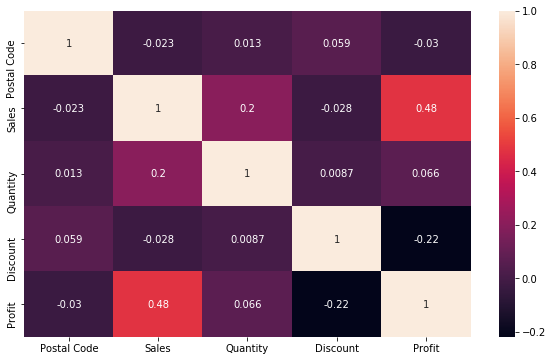

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot = True)
plt.show()

in the correlation dard color show that the variable are not so dependant on other variable and soft color shows that the variable are dependant on other variable

# Data Visulization

In [14]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

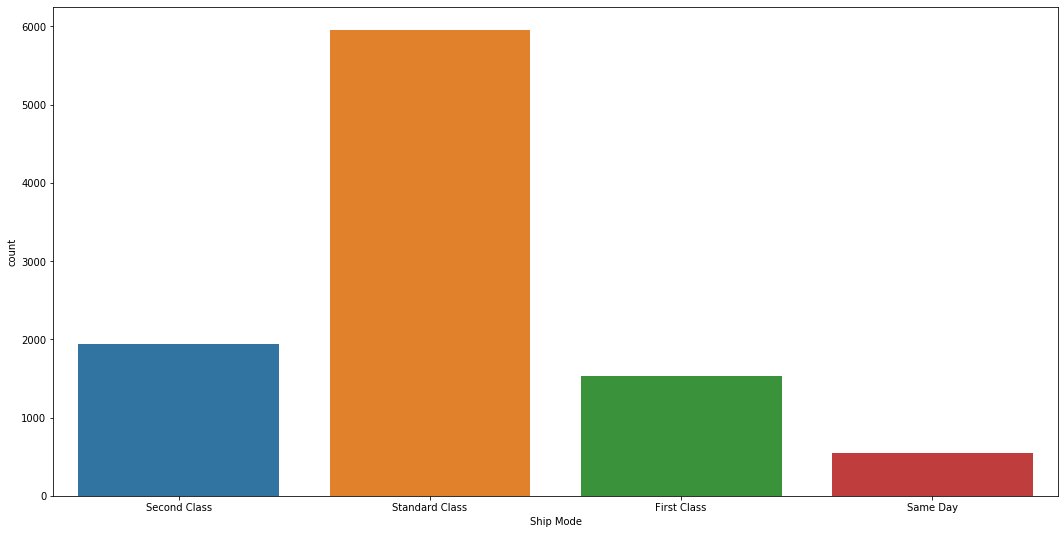

In [15]:
plt.figure(figsize=(18,9))
sns.countplot(x=data['Ship Mode'])
plt.show()

In [16]:
data['City'].value_counts()

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Margate            1
Layton             1
Atlantic City      1
Lindenhurst        1
Danbury            1
Name: City, Length: 531, dtype: int64

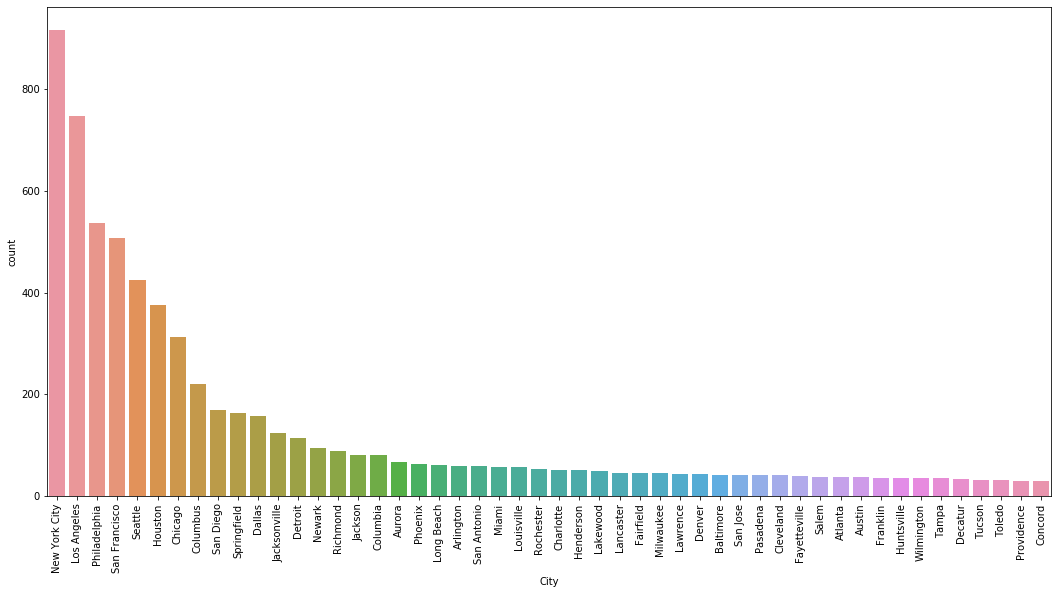

In [17]:
plt.figure(figsize=(18,9))
sns.countplot(x=data['City'],order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

In [18]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

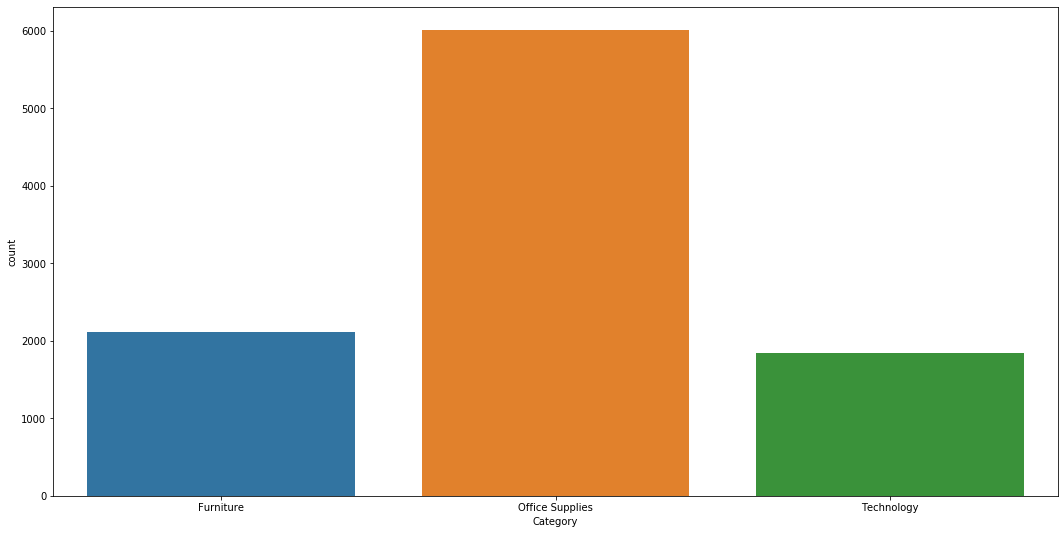

In [19]:
plt.figure(figsize=(18,9))
sns.countplot(x=data['Category'])
plt.show()

In [20]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

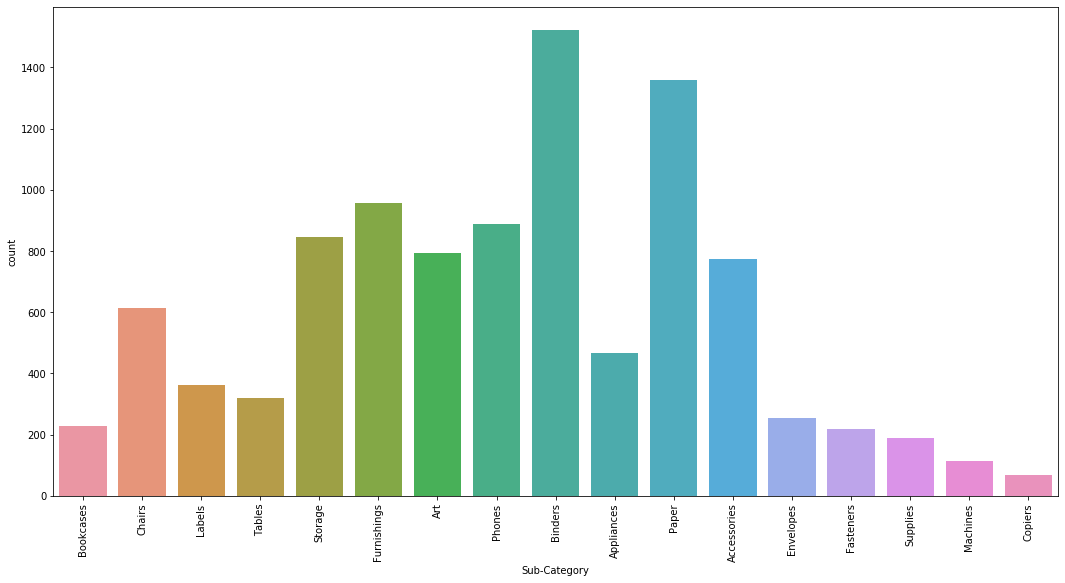

In [21]:
plt.figure(figsize=(18,9))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

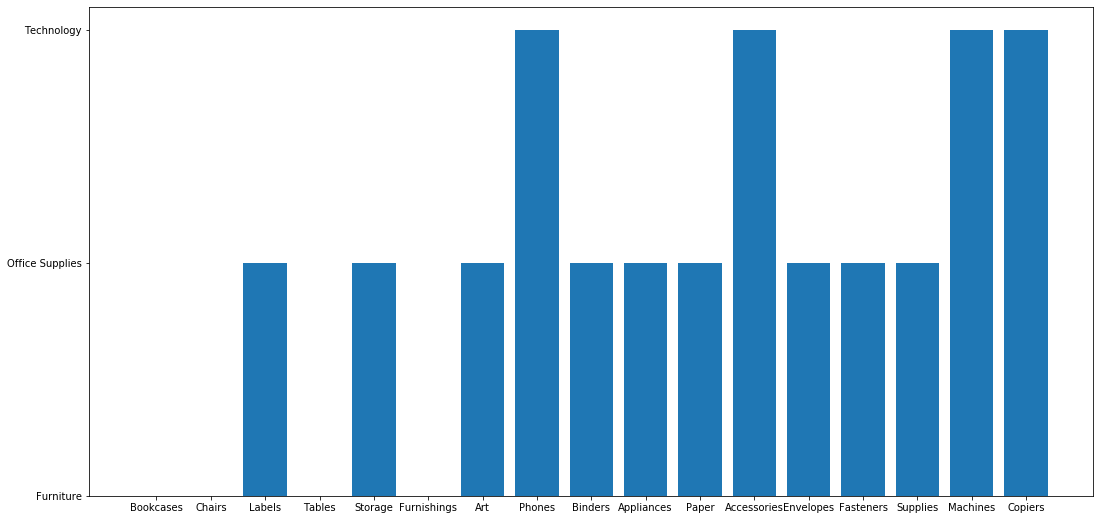

In [22]:
plt.figure(figsize=(18,9))
plt.bar('Sub-Category','Category',data=data)
plt.show()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

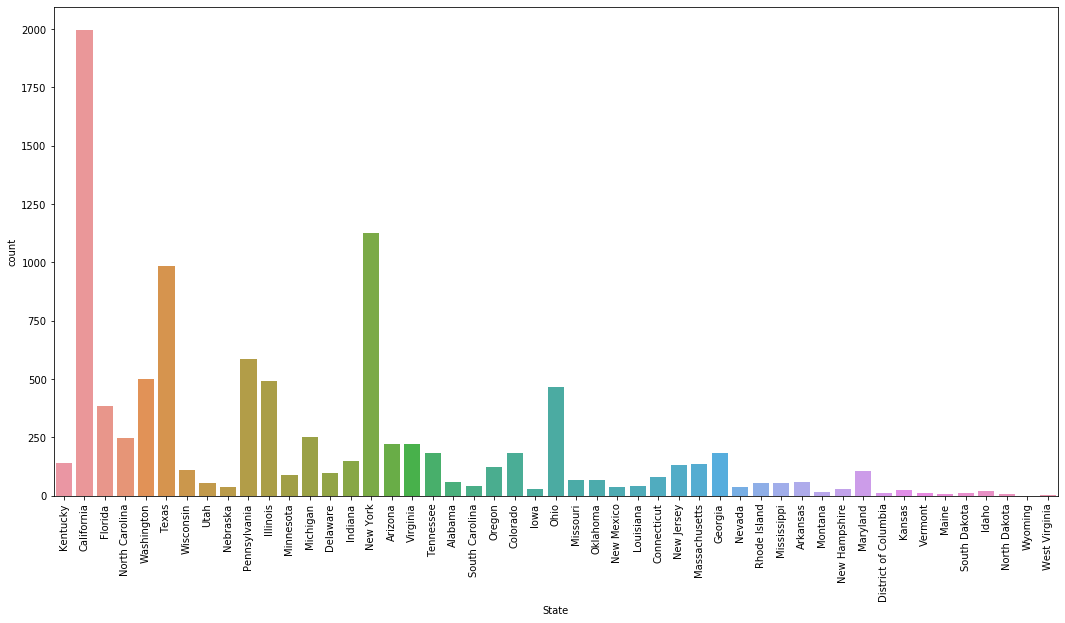

In [23]:
print(data['State'].value_counts())
plt.figure(figsize=(18,9))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

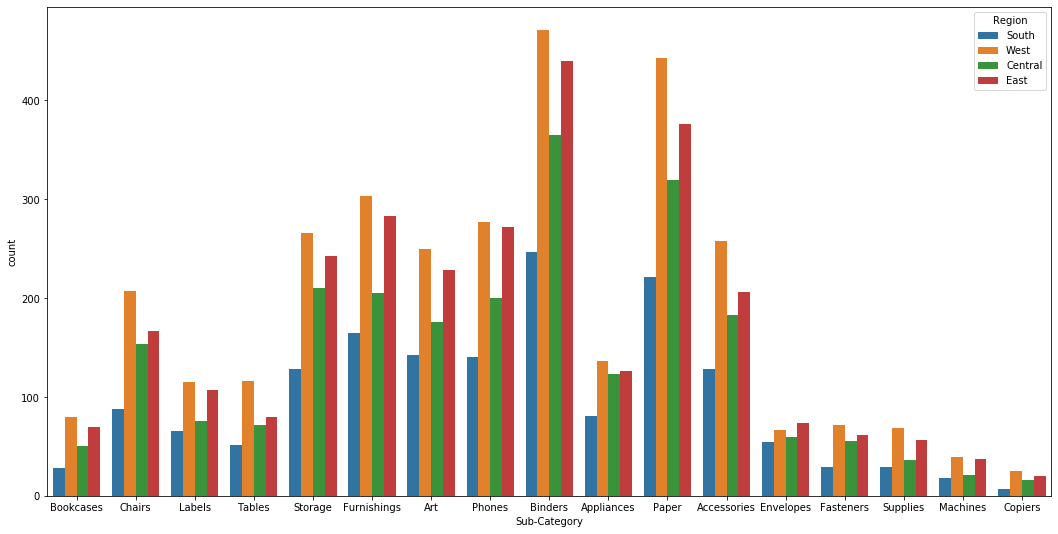

In [25]:
plt.figure(figsize=(18,9))
sns.countplot(x='Sub-Category',hue='Region',data=data)
plt.show()

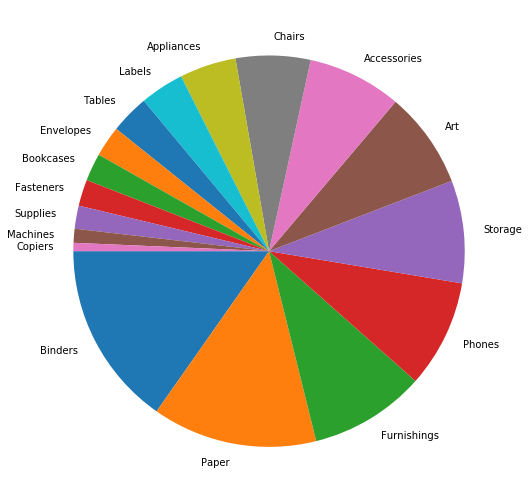

In [29]:
plt.figure(figsize=(18,9))
plt.pie(data['Sub-Category'].value_counts(),labels=data['Sub-Category'].value_counts().index, startangle=180, radius=1)
plt.show()

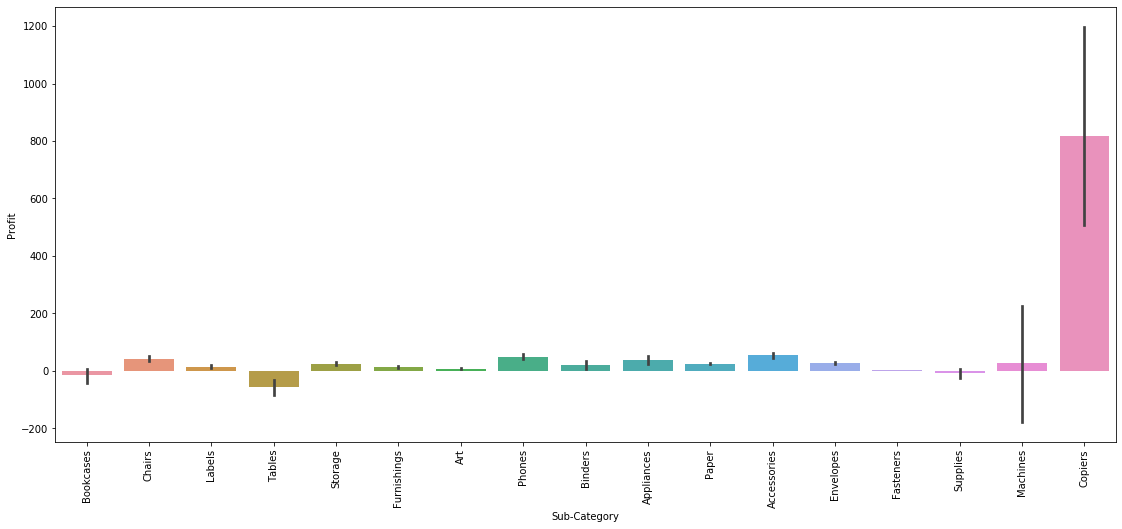

In [27]:
plt.figure(figsize=(19,8))
sns.barplot(x=data['Sub-Category'],y=data['Profit'])
plt.xticks(rotation=90)
plt.show()